In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, date, timedelta, timezone
import pandas as pd
import numpy as np
import random
import warnings
warnings.simplefilter('ignore')
from scipy.stats import linregress

from __future__ import annotations

import math
from dataclasses import dataclass
from typing import Iterable, Tuple

import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

try:
    from hmmlearn.hmm import GaussianHMM
except ImportError:
    GaussianHMM = None  # type: ignore

import matplotlib.pyplot as plt

In [13]:
mm = [0,1]
nn = [0,1]
indx = [0]

k = 0
for i in range(2,len(data)):
    
    if data.Close[i] >= max(list(data.Close[k:i-1])): #or i-k > 5000:
        k = i-1
        indx.append(k+1)
        
    mm.append(max(list(data.Close[k:i])))
    nn.append(min(list(data.Close[k:i])))

indx.append(len(data))

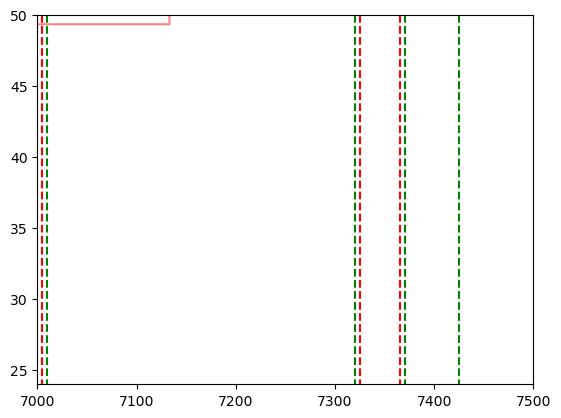

In [14]:
plt.plot(data.Close, color = "black")

plt.plot(mm, color = "g", alpha = 0.5)
plt.plot(nn, color = "r", alpha = 0.5)

#steady climb
plt.vlines(1200, 50, 0, colors='g', linestyles='dashed')
plt.vlines(2700, 50, 0, colors='g', linestyles='dashed')

#steep fall
plt.vlines(2800, 50, 0, colors='r', linestyles='dashed')
plt.vlines(3400, 50, 0, colors='r', linestyles='dashed')

#steep fall
plt.vlines(6060, 50, 0, colors='r', linestyles='dashed')
plt.vlines(6100, 50, 0, colors='r', linestyles='dashed')

#steady climb
plt.vlines(6120, 50, 0, colors='g', linestyles='dashed')
plt.vlines(6500, 50, 0, colors='g', linestyles='dashed')

#steep fall
plt.vlines(6580, 50, 0, colors='r', linestyles='dashed')
plt.vlines(7005, 50, 0, colors='r', linestyles='dashed')

#steady climb
plt.vlines(7010, 50, 0, colors='g', linestyles='dashed')
plt.vlines(7320, 50, 0, colors='g', linestyles='dashed')

#steep fall
plt.vlines(7325, 50, 0, colors='r', linestyles='dashed')
plt.vlines(7365, 50, 0, colors='r', linestyles='dashed')

plt.vlines(7370, 50, 0, colors='g', linestyles='dashed')
plt.vlines(7425, 50, 0, colors='g', linestyles='dashed')

plt.xlim(7000,7500)
plt.ylim(24,50)
plt.show()

## returns

In [15]:
data['returns'] = data['Close'].diff()/data['Close'].shift(1)
data['returns'].loc[data['returns'].isna()] = 0

In [43]:
lst = []
for i in range(len(data)):
    if data["returns"][i] >= 3*np.std(data['returns']) + np.mean(data['returns']):
        lst.append(1)
    elif data["returns"][i] <= -3*np.std(data['returns']) + np.mean(data['returns']):
        lst.append(-1)
    else:
        lst.append(0)
        
data["ret-state"] = lst # these should indicate large kinetic energy changes

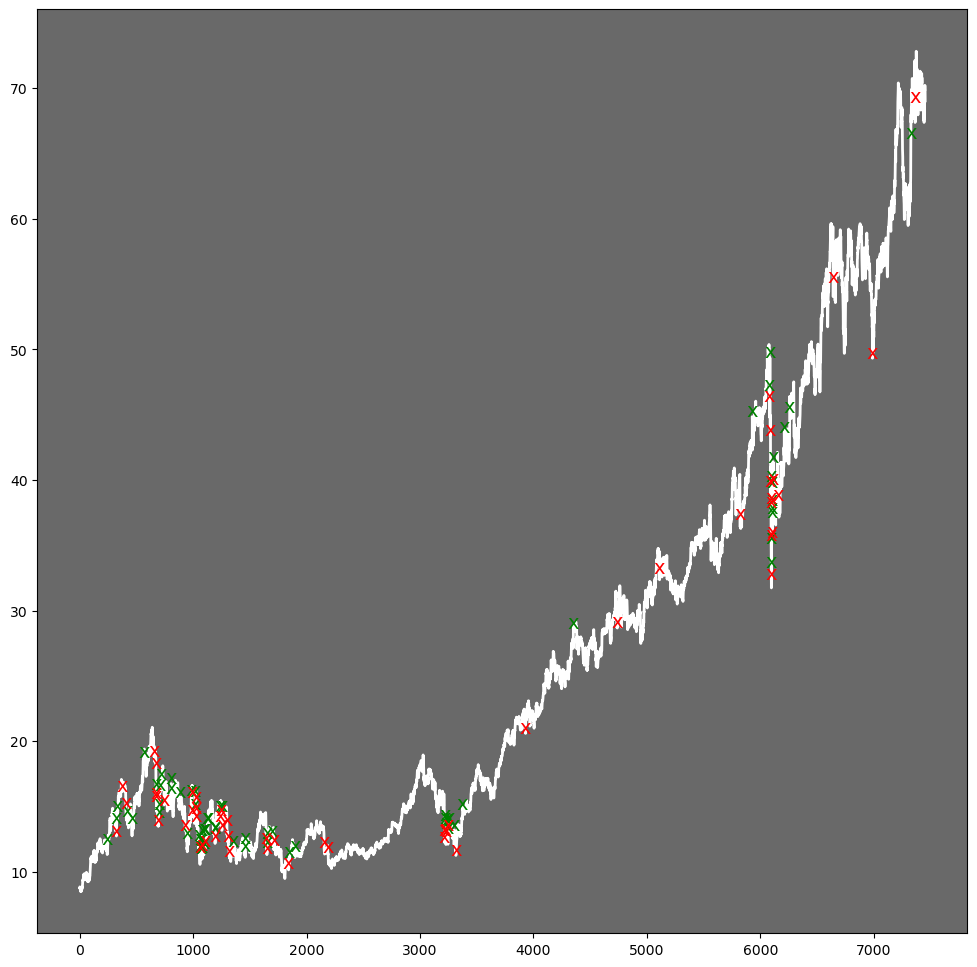

In [44]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = data["ret-state"][data["ret-state"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date, data.iloc[date, 3]), color='green', fontsize=14, ha='center')
    
up = data["ret-state"][data["ret-state"] == -1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date, data.iloc[date, 3]), color='red', fontsize=14, ha='center')

#plt.xlim(1000,3000)
#plt.ylim(0,50)
plt.show()

In [30]:
ret = []

for i in range(len(data)):
    ret.append(np.mean(data['returns'][0:i]))

In [26]:
ret_state = []

j = 0

for i in range(len(data)):
    
    if i > indx[j] and i < indx[j+1]:
        ret_state.append(np.mean(data['returns'][indx[j]:i]))
    elif i == indx[j+1]:
        ret_state.append(np.mean(data['returns'][i-10:i]))
        j = j + 1



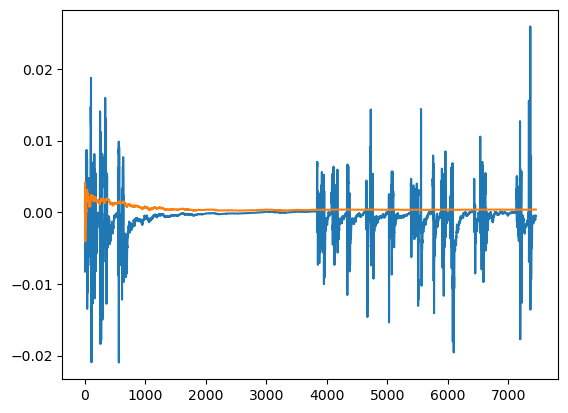

In [32]:
plt.plot(ret_state)
plt.plot(ret)

In [8]:
pos_neg = []
for i in range(len(data)):
    pos_neg.append(np.sign(data["returns"]))
data['PN_counter'] = pos_neg

## moving averages states

In [75]:
mma20 = data.Close.rolling(window=20).mean()
mma60 = data.Close.rolling(window=60).mean()

ema20 = data.Close.ewm(span=20, adjust=True).mean()
ema60 = data.Close.ewm(span=60, adjust=True).mean()

sma_state = []
for i in range(len(data)):
    if i < 20:
        sma_state.append(np.sign(data.Close[i] - ema20[i]))
    else:
        sma_state.append(min(np.sign(data.Close[i] - ema20[i]),np.sign(data.Close[i] - mma20[i])))

lma_state = []
for i in range(len(data)):
    if i < 60:
        lma_state.append(np.sign(data.Close[i] - ema60[i]))
    else:
        lma_state.append(min(np.sign(data.Close[i] - ema60[i]),np.sign(data.Close[i] - mma60[i])))
        
cmb_state = [0]
for i in range(len(data)):
    if lma_state[i] != sma_state[i] :
        cmb_state.append(0)
    elif lma_state[i] == 1 and sma_state[i] == 1:
        cmb_state.append(1)
    elif lma_state[i] == -1 and sma_state[i] == -1:
        cmb_state.append(-1)
        
data['SMA-state'] = sma_state
data['LMA-state'] = lma_state
data["Combo-state"] = cmb_state

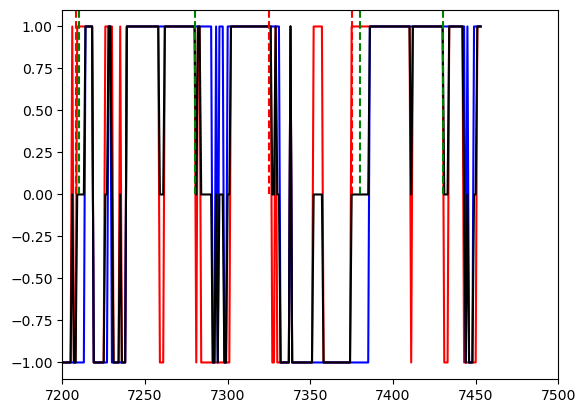

In [92]:
plt.plot(data.Close, color = "black")
plt.plot(data['SMA-state'], color = "red")
plt.plot(data['LMA-state'], color = "blue")
plt.plot(data['Combo-state'], color = "black")



plt.vlines(6580, 50, 0, colors='r', linestyles='dashed')
plt.vlines(6680, 50, 0, colors='r', linestyles='dashed')

plt.vlines(6777, 50, 0, colors='r', linestyles='dashed')
plt.vlines(6797, 50, 0, colors='r', linestyles='dashed')

plt.vlines(6825, 50, 0, colors='r', linestyles='dashed')
plt.vlines(6870, 50, 0, colors='r', linestyles='dashed')

# p > xma20
plt.vlines(7007, 50, 0, colors='g', linestyles='dashed')
plt.vlines(7190, 50, 0, colors='g', linestyles='dashed')

# p > xma20
plt.vlines(7192, 50, 0, colors='r', linestyles='dashed')
plt.vlines(7208, 50, 0, colors='r', linestyles='dashed')

# p > xma20
plt.vlines(7210, 50, 0, colors='g', linestyles='dashed')
plt.vlines(7280, 50, 0, colors='g', linestyles='dashed')

# p < xma20
plt.vlines(7325, 50, 0, colors='r', linestyles='dashed')
plt.vlines(7375, 50, 0, colors='r', linestyles='dashed')

# p > xma20
plt.vlines(7380, 50, 0, colors='g', linestyles='dashed')
plt.vlines(7430, 50, 0, colors='g', linestyles='dashed')




plt.xlim(7200,7500)
plt.ylim(-1.1,1.1)
plt.show()

## Pos-Neg fun

In [566]:
indx = []
for i in range(3,len(data)):
    if data["ITR2"][i-3] < 0 and data["ITR2"][i-2] < 0 and data["ITR2"][i-1] < 0 and data["ITR2"][i] < 0 and np.mean(data["ITR3"][i-3:i]) < data["ITR3"][i]:
        indx.append(i)
        
indx2 = []
for i in range(3,len(data)):
    if data["ITR2"][i-3] < 0 and data["ITR2"][i-2] < 0 and data["ITR2"][i-1] < 0 and data["ITR2"][i] < 0 and np.mean(data["ITR3"][i-3:i]) > data["ITR3"][i]:
        indx2.append(i)

In [576]:
lst = []
lst2 = []
for i in range(20, len(data)):
    lst.append(np.mean(data["ITR2"][i-20:i]))
    lst2.append(np.mean(data["ITR3"][i-20:i]))

In [581]:
indx = []
for i in range(20,len(data)):
    if np.mean(data["ITR2"][i-20:i]) < 0 and np.mean(data["ITR3"][i-20:i]) > 0: #up and slowing
        indx.append(i)
        
indx2 = []
for i in range(20,len(data)):
    if np.mean(data["ITR2"][i-20:i]) < 0 and np.mean(data["ITR3"][i-20:i]) < 0:
        indx2.append(i)

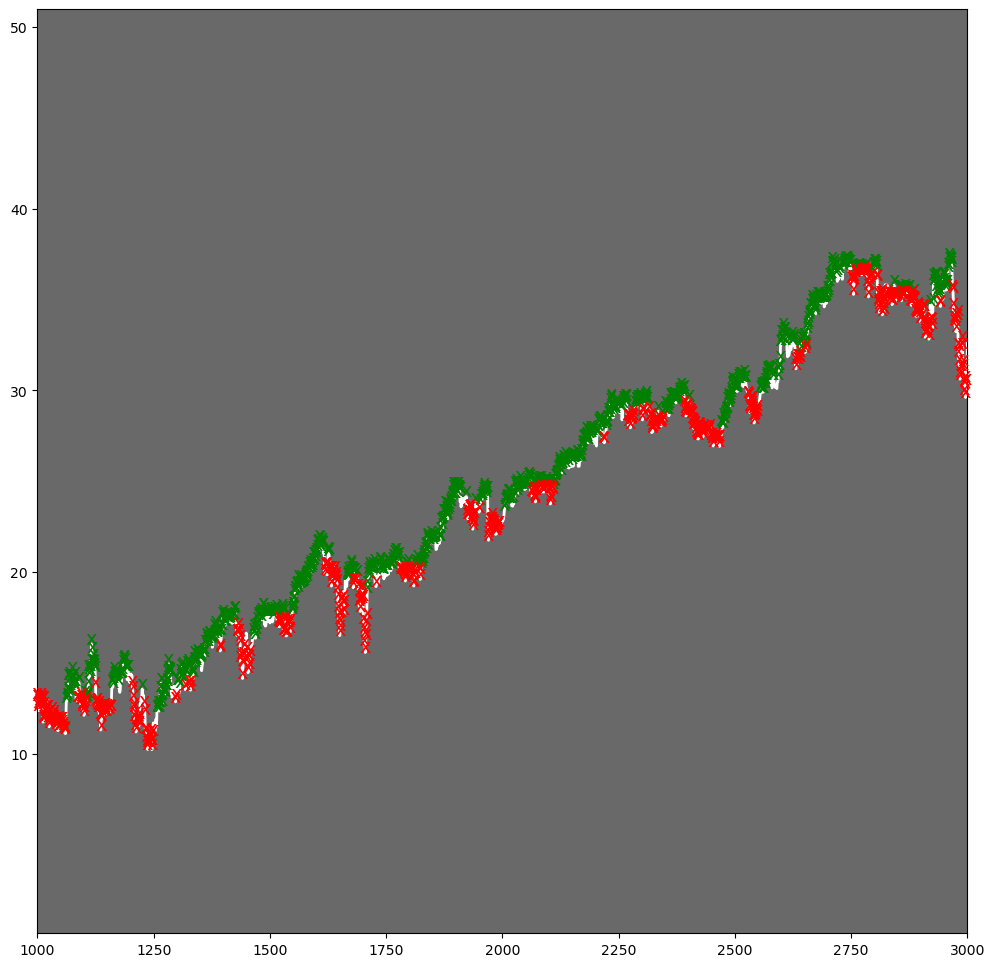

In [94]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = data["Combo-state"][data["Combo-state"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date, data.iloc[date, 3]), color='green', fontsize=14, ha='center')
    
up = data["Combo-state"][data["Combo-state"] == -1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date, data.iloc[date, 3]), color='red', fontsize=14, ha='center')

plt.xlim(1000,3000)
#plt.ylim(0,50)
plt.show()

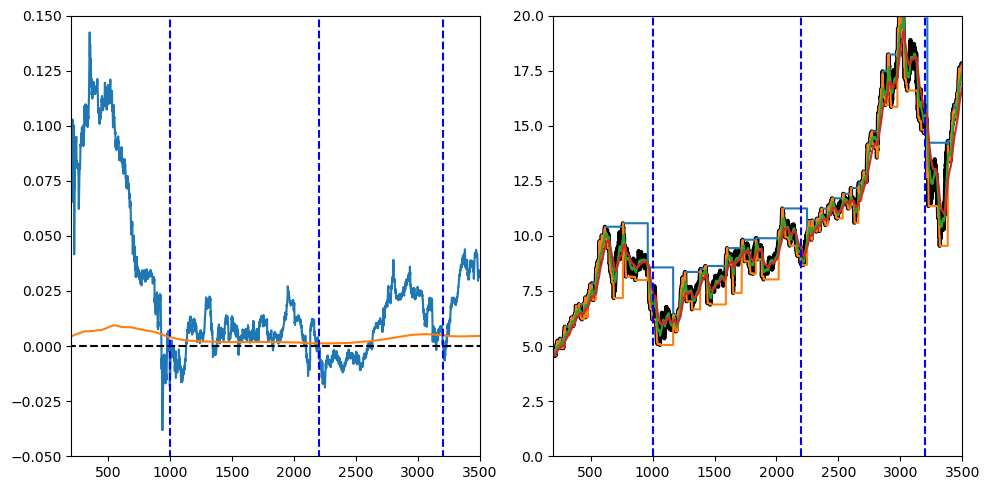

In [434]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot on the first subplot
axes[0].plot(imb20[100:])
axes[0].plot(list(data.slopes[100:]))
axes[0].hlines(y=0, xmin=0, xmax=7500, colors='black', linestyles='dashed')
axes[0].vlines(1000, -0.1, 0.2, colors='b', linestyles='dashed')
axes[0].vlines(2200, -0.1, 0.2, colors='b', linestyles='dashed')
axes[0].vlines(3200, -0.1, 0.2, colors='b', linestyles='dashed')
axes[0].set_xlim(200,3500)
axes[0].set_ylim(-0.05,0.15)

# Plot on the second subplot
axes[1].plot(list(data.Close), linewidth = 3, color = "black")
axes[1].plot(mm)
axes[1].plot(nn)
axes[1].plot(ema20)
axes[1].plot(ema60)
axes[1].vlines(1000, 0, 30, colors='b', linestyles='dashed')
axes[1].vlines(2200, 0, 30, colors='b', linestyles='dashed')
axes[1].vlines(3200, 0, 30, colors='b', linestyles='dashed')
axes[1].set_xlim(200,3500)
axes[1].set_ylim(0,20)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [104]:
vol = []
for i in range(len(data)):
    vol.append(np.mean(data['Volume'][0:i]))
    
vol_std = []
for i in range(len(vol)):
    vol_std.append(np.std(vol[0:i]))
                   

In [105]:
beta_test = []
for i in range(len(data)):
    beta_test.append(data['Volume'][i]/vol[i] * data['PN_counter'][i])
    
beta_test = pd.DataFrame(beta_test)

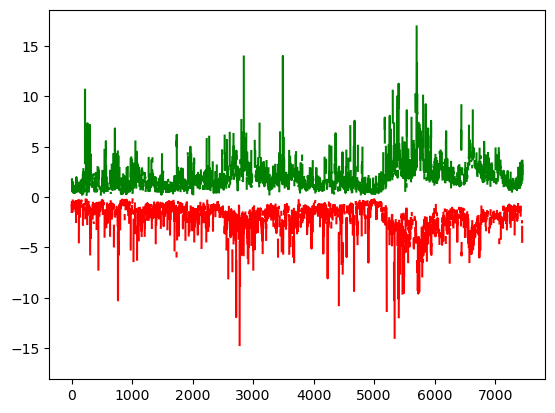

In [133]:
plt.plot(beta_test[beta_test > 0], color = "green")
plt.plot(beta_test[beta_test < 0], color = "red")

## Linear regression fun

In [169]:
lin_reg = [0]

for i in range(1,len(data)):
    if i < 2000:
        x = list(range(0, i))
        y = list(data.Close[0:i])
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        lin_reg.append(slope)
    else:
        x = list(range(0, 2000))
        y = list(data.Close[i-2000:i])
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        lin_reg.append(slope)
# Results
data["slopes"] = lin_reg

In [25]:
lst = []
for i in range(1,len(data)):
    if i < 200:
        lst.append(np.mean(data.returns[0:i]))
    else:
        lst.append(np.mean(data.returns[i-200:i]))

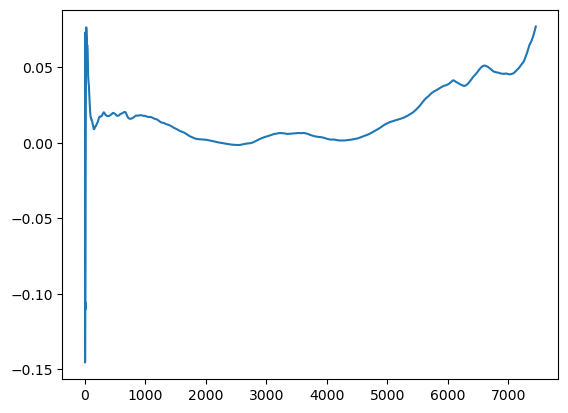

In [80]:
plt.plot(data.slopes)
plt.show()

# tests

In [ ]:
Bayesian Online Change-Point Detection

## HMM

## Clusterings

## DRL

In [ ]:
Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) Networks

# Engine design

In [7]:
class engine:
    
    def __init__(self, pp = 0):
        self.state = pp
        
        
    def __read_up(self, file = ""):
        try:
            with open("C:\\Users\\Mark Brezina\\OneDrive\\Skrivebord\\integral.txt", "r") as file:  # Opens file in read mode
                content = file.read()  # Reads the entire file
                print(content)
        except FileNotFoundError:
            print("The file does not exist.")
            
    def __load_out(self, file = ""):
        with open("C:\\Users\\Mark Brezina\\OneDrive\\Skrivebord\\integral.txt", "w") as file:  # Opens file in write mode
            file.write("Hello, World!\n")  # Writes to the file
            file.write("This is a new line.")


## data + libs

In [136]:
def RSI(data):
    
    delta = data.Close.diff()

    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the average gain and loss
    avg_gain = gain.rolling(window=14, min_periods=1).mean()
    avg_loss = loss.rolling(window=14, min_periods=1).mean()

    # Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))
    rsi.loc[rsi.isna()] = 0
    
    return(rsi)

def log_ret(s):                # daily log-return
    return np.log(s/ s.shift(1))

In [29]:
data = yf.Ticker("BAC") #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
data = data.history(start = "1996-01-01", end = "2025-08-15")
data = data.reset_index(drop = True)

In [30]:
data = data[["Open", "High", "Low", "Close", "Volume"]]

# returns
data['returns'] = data['Close'].diff()/data['Close'].shift(1)
data['returns'].loc[data['returns'].isna()] = 0

# log transform of returns
data['log returns'] = log_ret(data['Close'])

# acceleration
data['acc'] = data.returns.diff()/data.returns.shift(1)
data['acc'].loc[data['acc'].isna()] = 0
data['acc'][np.isinf(data['acc'])] = 0

# smoothed acceleration
data['acc6'] = data.acc.rolling(window=6).mean()
data['acc20'] = data.acc.rolling(window=20).mean()
data['acc40']= data.acc.rolling(window=40).mean()

# smoothed price
data['ma6'] = data['Close'].rolling(window=6).mean()
data['ma20'] = data['Close'].rolling(window=20).mean()
data['ma40']= data['Close'].rolling(window=40).mean()
data['ma120'] = data['Close'].rolling(window=120).mean()

# Compute MACD line and Signal line
data['EWM_short'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EWM_long']  = data['Close'].ewm(span=64, adjust=False).mean()
data['MACD'] = data['EWM_short'] - data['EWM_long']
data['MACD_Signal'] = data['MACD'].ewm(span=64, adjust=False).mean()

# ITR - interday true range
data['ITR'] = (data['High'] - data['Low']) / (data['Open'])
data['ITR'].loc[data['ITR'].isna()] = 0
data['ITR'][np.isinf(data['ITR'])] = 0

# RSI - relative strength index
data['RSI'] = RSI(data)
data['RSI'].loc[data['RSI'].isna()] = 0
data['RSI'][np.isinf(data['RSI'])] = 0

# ROC - rate of change
n = 24  # e.g. 24-hour lookback
data['ROC'] = (data.Close - data.Close.shift(n)) / data.Close.shift(n) * 100
data['ROC'].loc[data['ROC'].isna()] = 0
data['ROC'][np.isinf(data['ROC'])] = 0

n = 24
data['volatility'] = data['returns'].rolling(window=n).std()
data['VolAdjMomentum'] = data['returns'] / data['volatility']

data = data.fillna(0)

pos_neg = []
for j in range(len(data)):
    if data['returns'][j] >= 0:
        pos_neg.append(1)
    elif data['returns'][j] < 0:
        pos_neg.append(-1)
    else:
        pos_neg.append(0)
data['PN_counter'] = pos_neg

UD3 = ["","","","",""]
UD5 = ["","","","",""]
for j in range(5,len(data)):
    string = ""
    for k in range(5):
        if data['PN_counter'][j-(5-k)] == 1:
            string = string + "U"
        elif data['PN_counter'][j-(5-k)] == -1:
            string = string + "D"

    if j > 2:
        UD3.append(string[2:5])

    if j > 4:
        UD5.append(string)

data['UD3'] = UD3
data['UD5'] = UD5


imb = [0]
for i in range(1,len(data)):
    if i < 2000:
        imb.append(sum(data['PN_counter'][0:i] * data['Volume'][0:i]) / sum(data['Volume'][0:i]))
    else:
        imb.append(sum(data['PN_counter'][i-2000:i] * data['Volume'][i-2000:i]) / sum(data['Volume'][i-2000:i]))


data["IMB"] = imb

lin_reg = [0]
for i in range(1,len(data)):
    if i < 2000:
        x = list(range(0, i))
        y = list(data.Close[0:i])
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        lin_reg.append(slope)
    else:
        x = list(range(0, 2000))
        y = list(data.Close[i-2000:i])
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        lin_reg.append(slope)
# Results
data["slopes"] = lin_reg
data = data.fillna(0)

data["volume-state"] = data["Volume"].rolling(window=1000).mean()/np.mean(data["Volume"]) - 1
data = data.fillna(0)

# 1st version

## Imbalance/volume-state - states of demand

### Model development

In [94]:
lengths = []
Y = np.array([[0,0]])

for t in ["BAC", "PEP", "KO", "UL", "WFC", "C", "GS", "MSFT", "AAPL", "BTC-USD", "ETH-USD", "TRX-USD", "JPM", "AAL", "WMT", "AMZN", "TSLA", "IBM", "INTC", "AMD", "SONY", "MCD", "^GSPC", "BABA", "PFE", "AAL", "F", "GM", "OXY", "CRM", "KR", "DIS", "EBAY", "USB", "GT", "DAL", "PM", "DDOG", "ADA-USD", "DOT-USD", "V", "CNP", "XYZ", "COIN", "VTRS", "COMM", "UAL", "BAX", "BA", "XRP-USD", "SOL-USD", "DOGE-USD", "AVAX-USD"]:

    data = yf.Ticker(t) #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
    data = data.history(start = "1996-01-01", end = "2025-08-15")
    data = data.reset_index(drop = True)
    
    data = data[["Open", "High", "Low", "Close", "Volume"]]

    # returns
    data['returns'] = data['Close'].diff()/data['Close'].shift(1)
    data['returns'].loc[data['returns'].isna()] = 0
    
    # pn-counter
    pos_neg = []
    for j in range(len(data)):
        if data['returns'][j] >= 0:
            pos_neg.append(1)
        elif data['returns'][j] < 0:
            pos_neg.append(-1)
        else:
            pos_neg.append(0)
    data['PN_counter'] = pos_neg
    
    
    imb = [0]
    for i in range(1,len(data)):
        if i < 2000:
            imb.append(sum(data['PN_counter'][0:i] * data['Volume'][0:i]) / sum(data['Volume'][0:i]))
        else:
            imb.append(sum(data['PN_counter'][i-2000:i] * data['Volume'][i-2000:i]) / sum(data['Volume'][i-2000:i]))

    data["IMB"] = imb

    data = data.fillna(0)
    data["volume-state"] = data["Volume"].rolling(window=1000).mean()/np.mean(data["Volume"]) - 1
    data = data.fillna(0)
    
    #features needed 
    features = data[["IMB","volume-state"]][1000:]
    features = features.reset_index(drop = True)
    
    X = np.array(features)
    Y = np.concatenate([Y, X])
        
    lengths.append(len(features))

Y = Y[1:]
imb_model = GaussianHMM(n_components=3,covariance_type="full",n_iter=1000,random_state=2)
imb_model.fit(Y, lengths = lengths)

import pickle
from hmmlearn import hmm

# Assume `model` is your fitted HMM
# Save the model
with open("IMB.pkl", "wb") as f:
    pickle.dump(imb_model, f)

### Model test

In [95]:
data = yf.Ticker("XRP-USD") #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
data = data.history(start = "1996-01-01", end = "2025-08-15")
data = data.reset_index(drop = True)

data = data[["Open", "High", "Low", "Close", "Volume"]]

# returns
data['returns'] = data['Close'].diff()/data['Close'].shift(1)
data['returns'].loc[data['returns'].isna()] = 0

# pn-counter
pos_neg = []
for j in range(len(data)):
    if data['returns'][j] >= 0:
        pos_neg.append(1)
    elif data['returns'][j] < 0:
        pos_neg.append(-1)
    else:
        pos_neg.append(0)
data['PN_counter'] = pos_neg


imb = [0]
for i in range(1,len(data)):
    if i < 2000:
        imb.append(sum(data['PN_counter'][0:i] * data['Volume'][0:i]) / sum(data['Volume'][0:i]))
    else:
        imb.append(sum(data['PN_counter'][i-2000:i] * data['Volume'][i-2000:i]) / sum(data['Volume'][i-2000:i]))

data["IMB"] = imb

data = data.fillna(0)
data["volume-state"] = data["Volume"].rolling(window=1000).mean()/np.mean(data["Volume"]) - 1
data = data.fillna(0)

#features needed 
features = data[["IMB","volume-state"]][1000:]
features = features.reset_index(drop = True)

states = imb_model.predict(features)
a = pd.DataFrame(states, columns = ["State"]) 
# state 0 = accurately priced?
# state 1 = increase
# state 2 = leadup to correction?

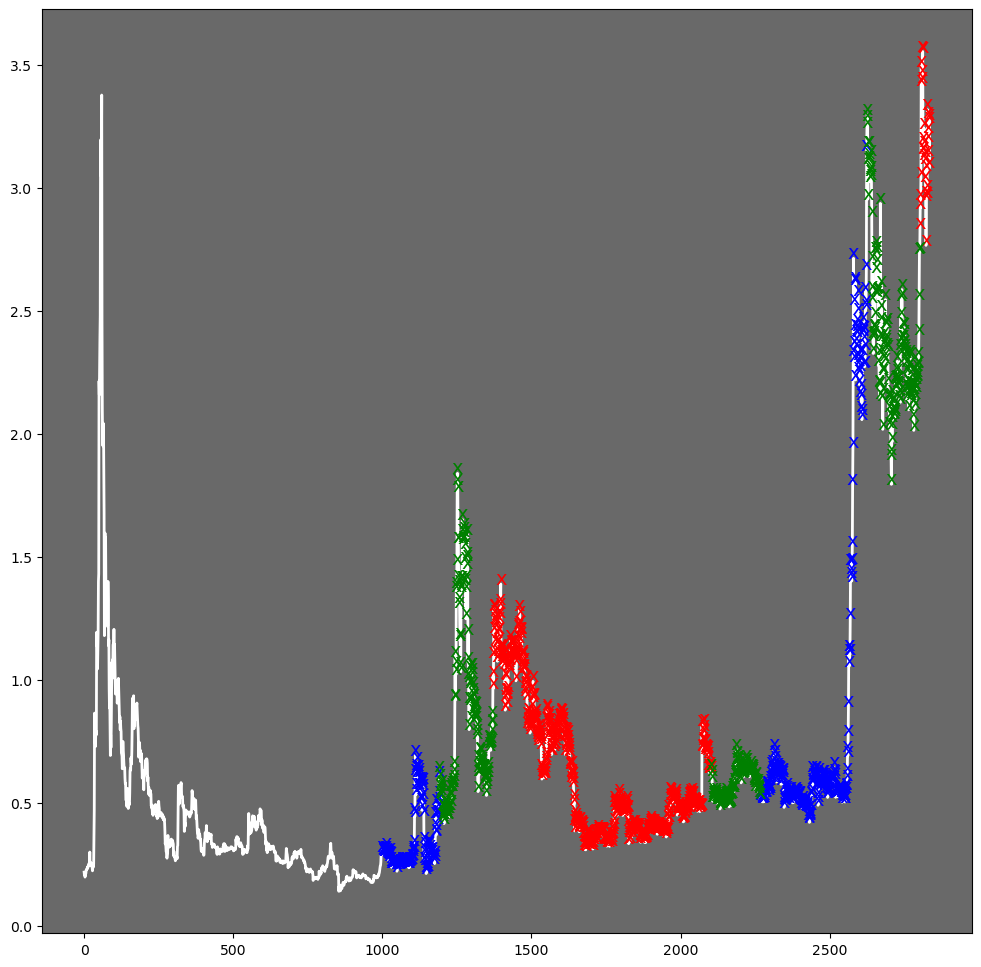

In [97]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = a["State"][a["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='blue', fontsize=14, ha='center') # correction? - after greens - demand decreasing
    
up = a["State"][a["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='red', fontsize=14, ha='center') # increases/ stable? - correct price? Demand increasing
    
up = a["State"][a["State"] == 2]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='green', fontsize=14, ha='center') #lead up to correction? - around reds - demand neutral
    
    
    
#plt.xlim(4000,7500)
#plt.ylim(0,30)
plt.show()

In [134]:
if states[i] == 1:
    print("trade as usual")
elif states[i] == 2:
    print("be cautious")
elif states[i] == 0:
    print("stop new positions or close")

be cautious


## Volatility states - states of investor uncertainty

### Model development

In [109]:
# needs to be more precision

lengths = []
Y = np.array([[0,0,0,0]])

for t in ["BAC", "PEP", "KO", "UL", "WFC", "C", "GS", "MSFT", "AAPL", "BTC-USD", "ETH-USD", "TRX-USD", "JPM", "AAL", "WMT", "AMZN", "TSLA", "IBM", "INTC", "AMD", "SONY", "MCD", "^GSPC", "BABA", "PFE", "AAL", "F", "GM", "OXY", "CRM", "KR", "DIS", "EBAY", "USB", "GT", "DAL", "PM", "DDOG", "ADA-USD", "DOT-USD", "V", "CNP", "XYZ", "COIN", "VTRS", "COMM", "UAL", "BAX", "BA", "XRP-USD", "SOL-USD", "DOGE-USD", "AVAX-USD"]:

    data = yf.Ticker(t) #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
    data = data.history(start = "1996-01-01", end = "2025-08-15")
    data = data.reset_index(drop = True)
    
    data = data[["Open", "High", "Low", "Close", "Volume"]]

    # returns
    data['returns'] = data['Close'].diff()/data['Close'].shift(1)
    data['returns'].loc[data['returns'].isna()] = 0

    data['volatility'] = data['returns'].rolling(window=n).std()
    data['VolAdjMomentum'] = data['returns'] / data['volatility']

    # ITR - interday true range
    data['ITR'] = (data['High'] - data['Low']) / (data['Open'])
    data['ITR'].loc[data['ITR'].isna()] = 0
    data['ITR'][np.isinf(data['ITR'])] = 0


    #features needed 
    features = data[["returns","volatility", "VolAdjMomentum", "ITR"]][1000:]
    features = features.reset_index(drop = True)
    
    X = np.array(features)
    Y = np.concatenate([Y, X])
        
    lengths.append(len(features))

Y = Y[1:]
vol_model = GaussianHMM(n_components=3,covariance_type="full",n_iter=1000,random_state=2)
vol_model.fit(Y, lengths = lengths)

import pickle
from hmmlearn import hmm

# Assume `model` is your fitted HMM
# Save the model
with open("VOL.pkl", "wb") as f:
    pickle.dump(vol_model, f)

### Model test

In [130]:
data = yf.Ticker("C") #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
data = data.history(start = "1996-01-01", end = "2025-08-15")
data = data.reset_index(drop = True)

data = data[["Open", "High", "Low", "Close", "Volume"]]
data['ma_price'] = data["Close"].rolling(20).mean()

# returns
data['returns'] = data['Close'].diff()/data['Close'].shift(1)
data['returns'].loc[data['returns'].isna()] = 0
data['log_return'] = np.log(data['ma_price'] / data['ma_price'].shift(1))

#volatilities
data['volatility'] = data['returns'].rolling(window=n).std()
data['VolAdjMomentum'] = data['returns'] / data['volatility']

# ITR - interday true range
data['ITR'] = (data['High'] - data['Low']) / (data['Open'])
data['ITR'].loc[data['ITR'].isna()] = 0
data['ITR'][np.isinf(data['ITR'])] = 0


#features needed 
features = data[["log_return","volatility", "VolAdjMomentum", "ITR"]][1000:]
features = features.reset_index(drop = True)

#vol_model = GaussianHMM(n_components=3,covariance_type="full",n_iter=1000,random_state=2)
#vol_model.fit(features)

gmm = GaussianMixture(n_components=3,covariance_type="full", random_state=2)
gmm.fit(features)
labels = gmm.predict(features)


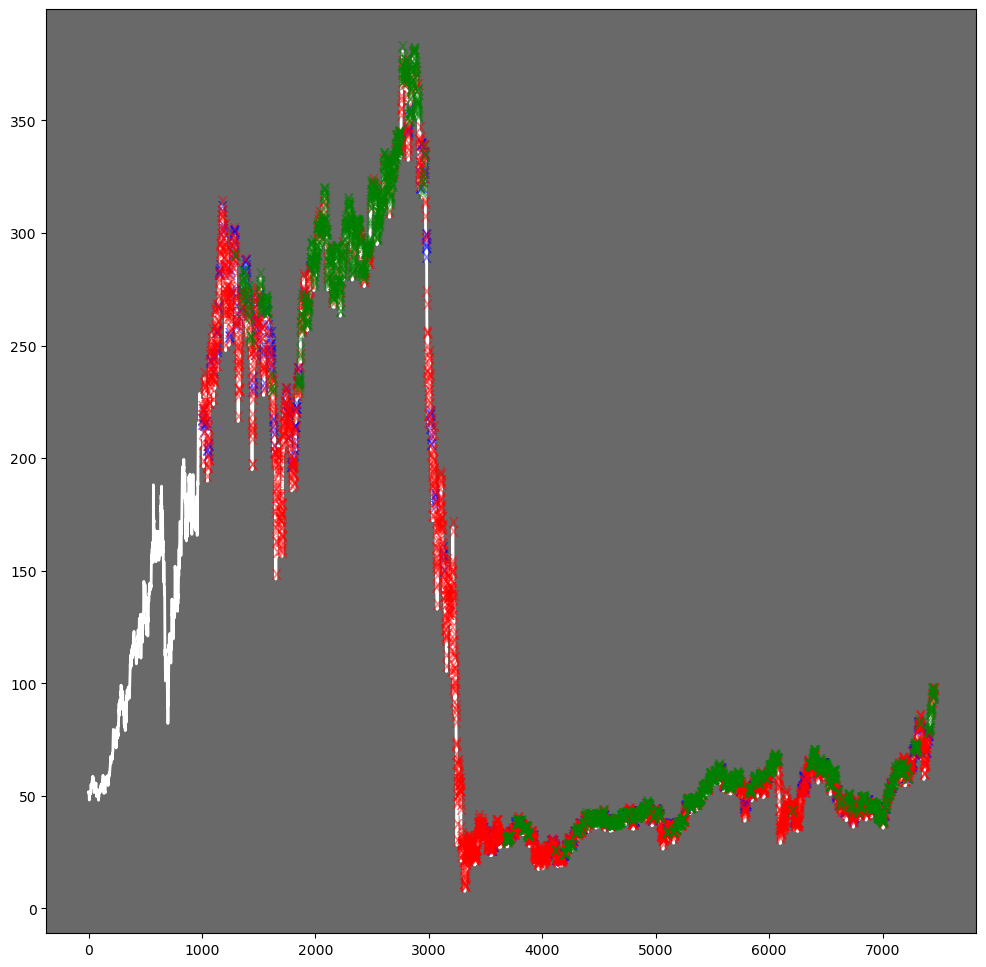

In [131]:
states = vol_model.predict(features)
a = pd.DataFrame(states, columns = ["State"]) 
# state 0 = accurately priced?
# state 1 = increase
# state 2 = leadup to correction?

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = a["State"][a["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='blue', fontsize=14, ha='center', alpha = 0.5) # stable
    
up = a["State"][a["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='red', fontsize=14, ha='center', alpha = 0.5) # high volatility
    
up = a["State"][a["State"] == 2]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='green', fontsize=14, ha='center', alpha = 0.5) # middle
    
    
    
#plt.xlim(1700,2600)
#plt.ylim(0,1)
plt.show()

In [88]:
red = high state 1
green = low state 2
blue = medium state 0

SyntaxError: invalid syntax (304727863.py, line 3)

In [39]:
#scaler = StandardScaler()
#X = scaler.fit_transform(data[["log_return", "volatility", "VolAdjMomentum", "ITR"]])
X = features
bic_scores = []
for n in range(1, 15 + 1):
    gmm = GaussianMixture(n_components=n,
                          covariance_type="full",
                          random_state=2)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    best_k = int(np.argmin(bic_scores) + 1)

print(best_k)
gmm = GaussianMixture(n_components=best_k,
                     covariance_type="full",
                     random_state=2)
gmm.fit(features)
labels = gmm.predict(features)

11


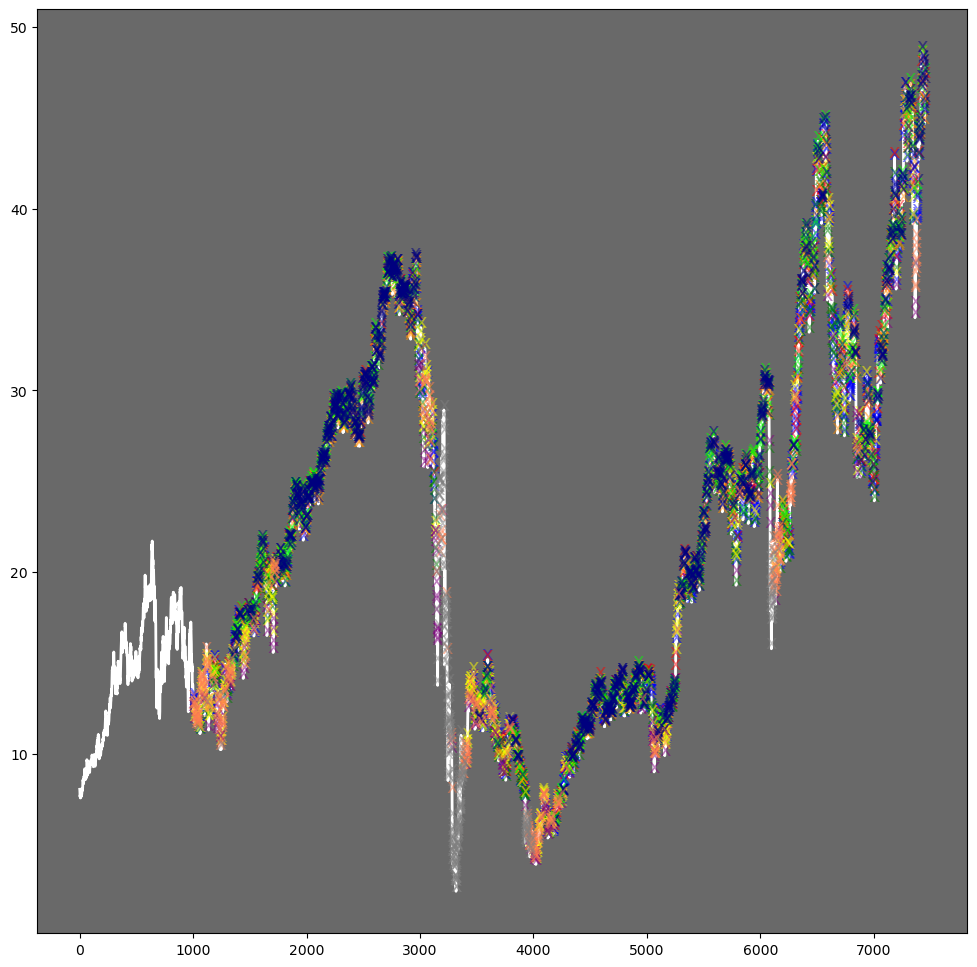

In [41]:
# state 0 = accurately priced?
# state 1 = increase
# state 2 = leadup to correction?
a = pd.DataFrame(labels, columns = ["State"])
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = a["State"][a["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='blue', fontsize=14, ha='center', alpha = 0.5) # stable
    
up = a["State"][a["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='red', fontsize=14, ha='center', alpha = 0.5) # high volatility
    
up = a["State"][a["State"] == 2]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='green', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 3]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='yellow', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 4]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='darkorange', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 5]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='purple', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 6]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='lime', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 7]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='navy', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 8]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='coral', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 9]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='grey', fontsize=14, ha='center', alpha = 0.5) # middle
    
    
#plt.xlim(1000,2800)
#plt.ylim(18000,80000)
plt.show()

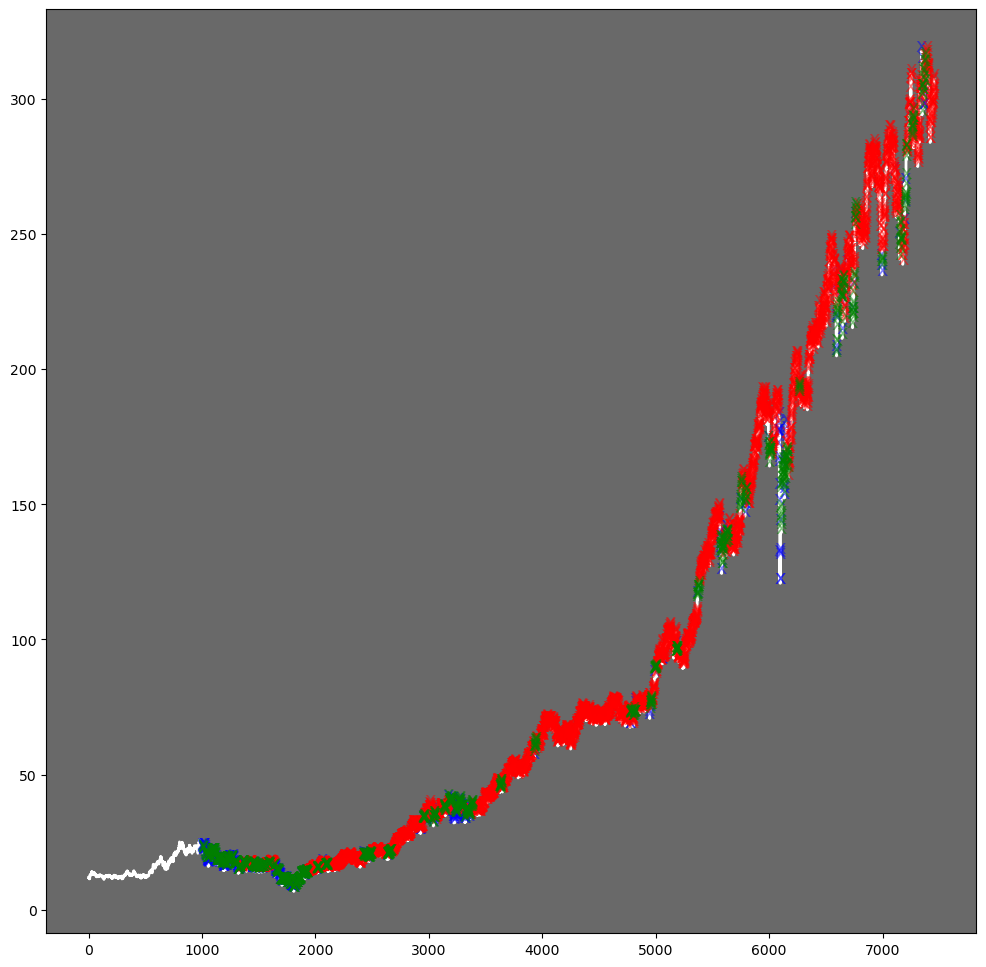

In [28]:
from sklearn.preprocessing import StandardScaler
prices = data.Close
df = pd.DataFrame({'price': prices})
# Smooth prices with a moving average to reduce high‑frequency noise
df['ma_price'] = df['price'].rolling(20).mean()
# Compute log returns of the smoothed series
df['log_return'] = np.log(df['ma_price'] / df['ma_price'].shift(1))
# Realised volatility as rolling standard deviation of log returns
df['volatility'] = df['log_return'].rolling(20).std()
df.dropna(inplace=True)
# Standardise features to zero mean and unit variance
scaler = StandardScaler()
X = scaler.fit_transform(df[['log_return', 'volatility']])

bic_scores = []
for n in range(1, 15 + 1):
    gmm = GaussianMixture(n_components=n,
                          covariance_type="full",
                          random_state=2)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    best_k = int(np.argmin(bic_scores) + 1)

gmm = GaussianMixture(n_components=best_k,
                     covariance_type="full",
                     random_state=2)
gmm.fit(features)
labels = gmm.predict(features)

In [34]:
bic_scores

[42075.98540702016,
 32883.22582243686,
 32453.802494452644,
 30542.31986038063,
 30353.057708591637,
 30263.511631963524,
 30091.333200999372,
 30051.293218176008,
 30147.008305020816,
 29986.556176003152,
 30018.556929989605,
 30021.616493943304,
 30007.23083167722,
 30020.011863002863,
 30005.23800407972]

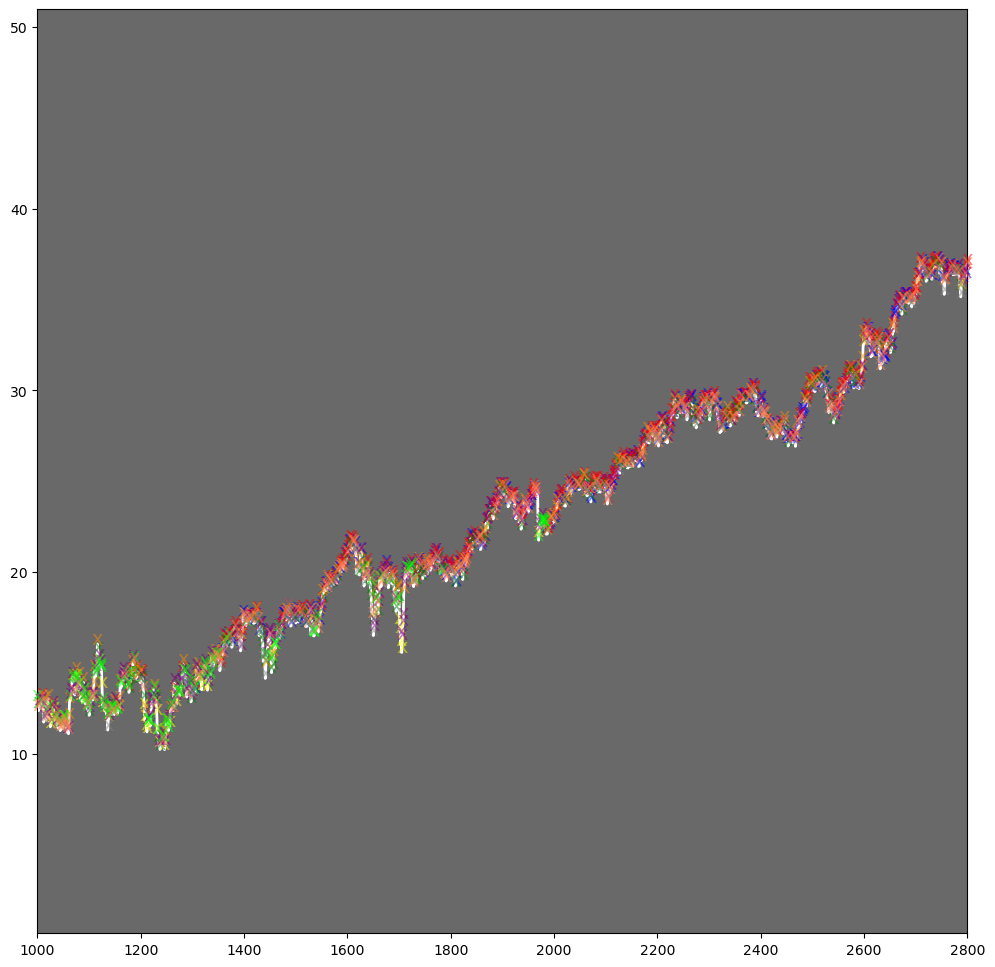

In [35]:
# state 0 = accurately priced?
# state 1 = increase
# state 2 = leadup to correction?
a = pd.DataFrame(labels, columns = ["State"])
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = a["State"][a["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='blue', fontsize=14, ha='center', alpha = 0.5) # stable
    
up = a["State"][a["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='red', fontsize=14, ha='center', alpha = 0.5) # high volatility
    
up = a["State"][a["State"] == 2]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='green', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 3]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='yellow', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 4]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='darkorange', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 5]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='purple', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 6]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='lime', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 7]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='navy', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 8]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='coral', fontsize=14, ha='center', alpha = 0.5) # middle
    
up = a["State"][a["State"] == 9]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='grey', fontsize=14, ha='center', alpha = 0.5) # middle
    
    
    
plt.xlim(1000,2800)
#plt.ylim(18000,80000)
plt.show()

## returns states

### Model development

In [137]:
# needs to be more precision

lengths = []
Y = np.array([[0,0,0,0,0,0,0]])

for t in ["BAC", "PEP", "KO", "UL", "WFC", "C", "GS", "MSFT", "AAPL", "BTC-USD", "ETH-USD", "TRX-USD", "JPM", "AAL", "WMT", "AMZN", "TSLA", "IBM", "INTC", "AMD", "SONY", "MCD", "^GSPC", "BABA", "PFE", "AAL", "F", "GM", "OXY", "CRM", "KR", "DIS", "EBAY", "USB", "GT", "DAL", "PM", "DDOG", "ADA-USD", "DOT-USD", "V", "CNP", "XYZ", "COIN", "VTRS", "COMM", "UAL", "BAX", "BA", "XRP-USD", "SOL-USD", "DOGE-USD", "AVAX-USD"]:

    data = yf.Ticker(t) #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
    data = data.history(start = "1996-01-01", end = "2025-08-15")
    data = data.reset_index(drop = True)
    
    data = data[["Open", "High", "Low", "Close", "Volume"]]

    # returns
    data['returns'] = data['Close'].diff()/data['Close'].shift(1)
    data['returns'].loc[data['returns'].isna()] = 0

    # log transform of returns
    data['log returns'] = log_ret(data['Close'])

    # Long-term returns
    data['returns1'] = data['Close'].diff()/data['Close'].shift(21)
    data['returns1'].loc[data['returns1'].isna()] = 0

    data['returns3'] = data['Close'].diff()/data['Close'].shift(63)
    data['returns3'].loc[data['returns3'].isna()] = 0

    data['returns6'] = data['Close'].diff()/data['Close'].shift(126)
    data['returns6'].loc[data['returns6'].isna()] = 0

    data['ma21'] = data['Close'].rolling(window=21).mean()
    data['ma63'] = data['Close'].rolling(window=63).mean()
    data['ma126']= data['Close'].rolling(window=126).mean()

    data["sma-s"] = np.sign(data["Close"] - data["ma21"])
    data["mma-s"] = np.sign(data["Close"] - data["ma63"])
    data["lma-s"] = np.sign(data["Close"] - data["ma126"])

    #features needed 
    features = data[["log returns", "returns1","returns3","returns6", "sma-s","mma-s","lma-s"]][1000:]
    features = features.reset_index(drop = True)
    
    X = np.array(features)
    Y = np.concatenate([Y, X])
        
    lengths.append(len(features))

Y = Y[1:]
ret_model = GaussianHMM(n_components=2,covariance_type="full",n_iter=1000,random_state=2)
ret_model.fit(Y, lengths = lengths)

import pickle

# Assume `model` is your fitted HMM
# Save the model
with open("ret.pkl", "wb") as f:
    pickle.dump(imb_model, f)

### Model test

In [138]:
data = yf.Ticker("BAC") #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
data = data.history(start = "1996-01-01", end = "2025-08-15")
data = data.reset_index(drop = True)

data = data[["Open", "High", "Low", "Close", "Volume"]]

# returns
data['returns'] = data['Close'].diff()/data['Close'].shift(1)
data['returns'].loc[data['returns'].isna()] = 0

# log transform of returns
data['log returns'] = log_ret(data['Close'])

# Long-term returns
data['returns1'] = data['Close'].diff()/data['Close'].shift(21)
data['returns1'].loc[data['returns1'].isna()] = 0

data['returns3'] = data['Close'].diff()/data['Close'].shift(63)
data['returns3'].loc[data['returns3'].isna()] = 0

data['returns6'] = data['Close'].diff()/data['Close'].shift(126)
data['returns6'].loc[data['returns6'].isna()] = 0

data['ma6'] = data['Close'].rolling(window=21).mean()
data['ma20'] = data['Close'].rolling(window=63).mean()
data['ma60']= data['Close'].rolling(window=126).mean()

data["sma-s"] = np.sign(data["Close"] - data["ma6"])
data["mma-s"] = np.sign(data["Close"] - data["ma20"])
data["lma-s"] = np.sign(data["Close"] - data["ma60"])

#features needed 
features = data[["log returns", "returns1","returns3","returns6", "sma-s","mma-s","lma-s"]][1000:]
features = features.reset_index(drop = True)

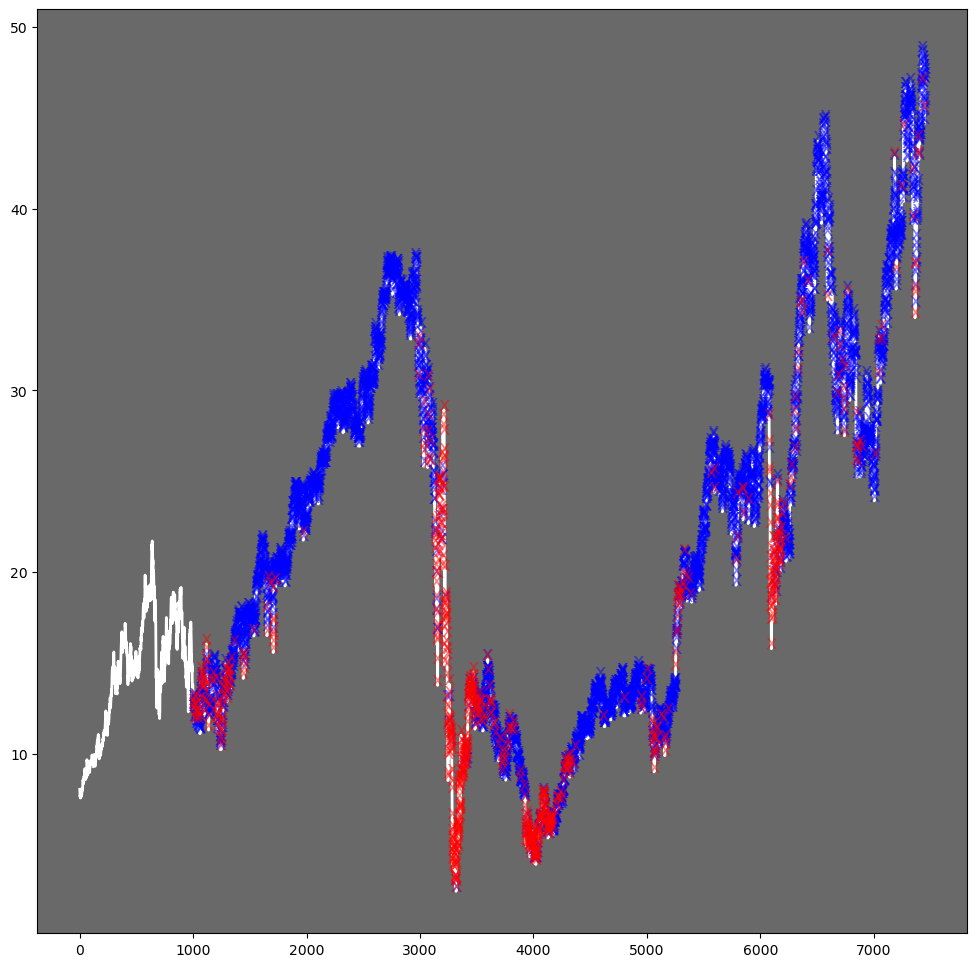

In [140]:
states = ret_model.predict(features)
a = pd.DataFrame(states, columns = ["State"]) 
# state 0 = accurately priced?
# state 1 = increase
# state 2 = leadup to correction?

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = a["State"][a["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='blue', fontsize=14, ha='center', alpha = 0.5) # standard returns
    
up = a["State"][a["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='red', fontsize=14, ha='center', alpha = 0.5) # exceptional
    
    
#plt.xlim(2500,3500)
#plt.ylim(10,20)
plt.show()

## Price 

### Model development

In [147]:
# needs to be more precision

lengths = []
Y = np.array([[0,0,0,0,0,0]])

for t in ["BAC", "PEP", "KO", "UL", "WFC", "C", "GS", "MSFT", "AAPL", "BTC-USD", "ETH-USD", "TRX-USD", "JPM", "AAL", "WMT", "AMZN", "TSLA", "IBM", "INTC", "AMD", "SONY", "MCD", "^GSPC", "BABA", "PFE", "AAL", "F", "GM", "OXY", "CRM", "KR", "DIS", "EBAY", "USB", "GT", "DAL", "PM", "DDOG", "ADA-USD", "DOT-USD", "V", "CNP", "XYZ", "COIN", "VTRS", "COMM", "UAL", "BAX", "BA", "XRP-USD", "SOL-USD", "DOGE-USD", "AVAX-USD"]:

    data = yf.Ticker(t) #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
    data = data.history(start = "1996-01-01", end = "2025-08-15")
    data = data.reset_index(drop = True)
    
    data = data[["Open", "High", "Low", "Close", "Volume"]]

    data['ma20'] = data['Close'].rolling(window=20).mean()
    data['ma40'] = data['Close'].rolling(window=40).mean()
    data['ma120']= data['Close'].rolling(window=120).mean()

    # Compute MACD line and Signal line
    data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['EMA40']  = data['Close'].ewm(span=40, adjust=False).mean()
    data['EMA120']  = data['Close'].ewm(span=120, adjust=False).mean()

    data["sma-s"] = np.sign(data["Close"] - data["ma20"])
    data["mma-s"] = np.sign(data["Close"] - data["ma40"])
    data["lma-s"] = np.sign(data["Close"] - data["ma120"])

    data["sEma-s"] = np.sign(data["Close"] - data['EMA20'])
    data["mEma-s"] = np.sign(data["Close"] - data["EMA40"])
    data["lEma-s"] = np.sign(data["Close"] - data["EMA120"])

    #features needed 
    features = data[["sma-s","mma-s","lma-s", "sEma-s", "mEma-s", "lEma-s"]][1000:]
    features = features.reset_index(drop = True)
    
    X = np.array(features)
    Y = np.concatenate([Y, X])
        
    lengths.append(len(features))

Y = Y[1:]
pp_model = GaussianHMM(n_components=5,covariance_type="full",n_iter=1000,random_state=2)
pp_model.fit(Y, lengths = lengths)

import pickle
from hmmlearn import hmm

# Assume `model` is your fitted HMM
# Save the model
with open("price.pkl", "wb") as f:
    pickle.dump(imb_model, f)

Model is not converging.  Current: 4349717.215570306 is not greater than 8043609.403006432. Delta is -3693892.1874361252


### Model test

In [148]:
data = yf.Ticker("C") #PEP, KO er utroligt stabile. NOVAQ, BAC er utroligt ustabil
data = data.history(start = "1996-01-01", end = "2025-08-15")
data = data.reset_index(drop = True)

data = data[["Open", "High", "Low", "Close", "Volume"]]

data['ma20'] = data['Close'].rolling(window=20).mean()
data['ma40'] = data['Close'].rolling(window=40).mean()
data['ma120']= data['Close'].rolling(window=120).mean()

# Compute MACD line and Signal line
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA40']  = data['Close'].ewm(span=40, adjust=False).mean()
data['EMA120']  = data['Close'].ewm(span=120, adjust=False).mean()

data["sma-s"] = np.sign(data["Close"] - data["ma20"])
data["mma-s"] = np.sign(data["Close"] - data["ma40"])
data["lma-s"] = np.sign(data["Close"] - data["ma120"])

data["sEma-s"] = np.sign(data["Close"] - data['EMA20'])
data["mEma-s"] = np.sign(data["Close"] - data["EMA40"])
data["lEma-s"] = np.sign(data["Close"] - data["EMA120"])

#features needed 
features = data[["sma-s","mma-s","lma-s", "sEma-s", "mEma-s", "lEma-s"]][1000:]
features = features.reset_index(drop = True)

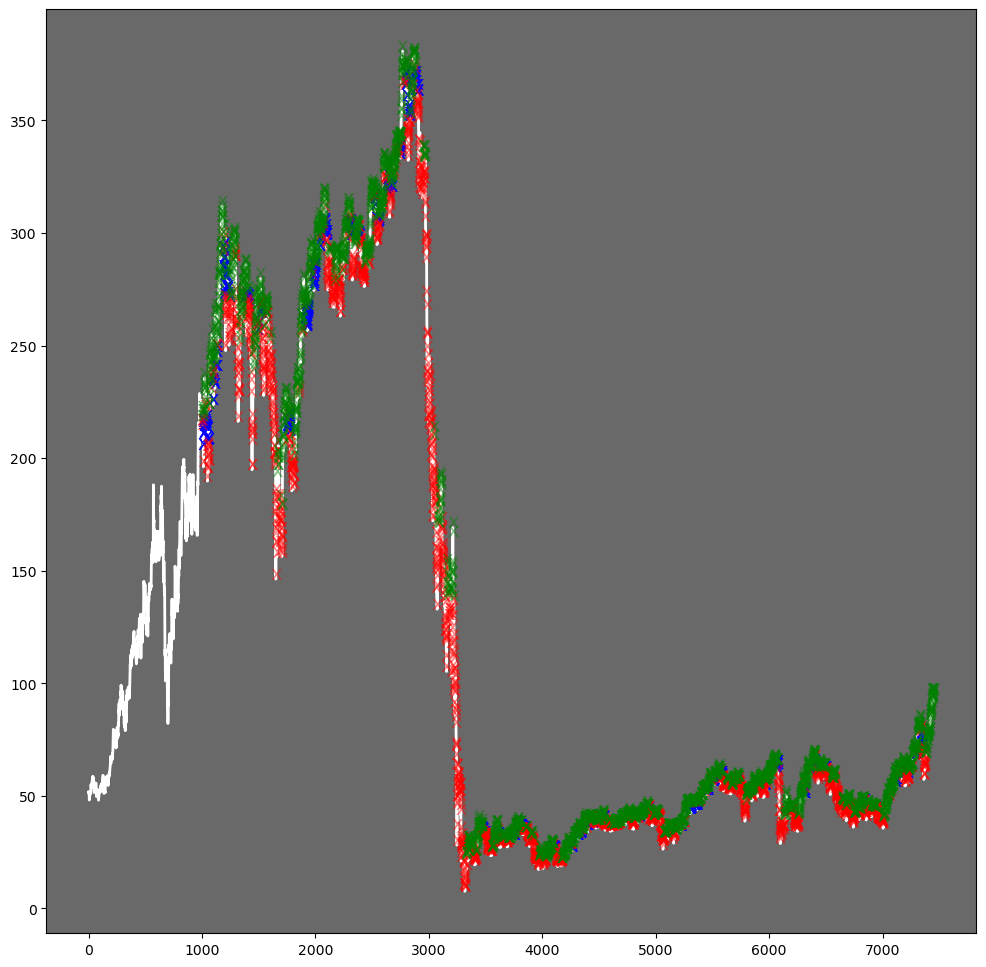

In [149]:
states = pp_model.predict(features)
a = pd.DataFrame(states, columns = ["State"]) 
# state 0 = accurately priced?
# state 1 = increase
# state 2 = leadup to correction?

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = a["State"][a["State"] == 2]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='blue', fontsize=14, ha='center', alpha = 1) # noise?
    
up = a["State"][a["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='red', fontsize=14, ha='center', alpha = 0.5) # inner price estimate
    
up = a["State"][a["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date+1000, data.iloc[date+1000, 3]), color='green', fontsize=14, ha='center', alpha = 0.5) # inner price estimate
    
    
#plt.xlim(1000,2000)
#plt.ylim(10,20)
plt.show()

## other

In [ ]:
def train_hmm(features: np.ndarray, n_states: int = 2,
              covariance_type: str = 'full',
              n_iter: int = 100,
              random_state: int | None = None
              ):
    if GaussianHMM is None:
        print("hmmlearn is not installed; cannot fit HMM.")
        return None, np.zeros(len(features), dtype=int)

    model = GaussianHMM(n_components=n_states,
                        covariance_type=covariance_type,
                        n_iter=n_iter,
                        random_state=random_state)
    model.fit(features)
    states = model.predict(features)
    return model, states

def train_gmm(features: np.ndarray, n_components: int = 2,
              covariance_type: str = 'full',
              random_state: int | None = None
              ):

    gmm = GaussianMixture(n_components=n_components,
                         covariance_type=covariance_type,
                         random_state=random_state)
    gmm.fit(features)
    labels = gmm.predict(features)
    return gmm, labels

def train_agglomerative(features: np.ndarray, n_clusters: int = 2,
                        linkage: str = 'ward'):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage=linkage)
    labels = model.fit_predict(features)
    return model, labels

In [60]:
df = prepare_price_data(data)[0]
features = prepare_price_data(data)[1]
df = df.reset_index(drop = True)
df = compute_basic_features(df)
df = df.reset_index(drop = True)

In [83]:
a = pd.DataFrame(train_hmm(features)[1])
b = pd.DataFrame(train_gmm(features)[1])
c = pd.DataFrame(train_agglomerative(features)[1])

lst = []
for i in range(len(a)):
    if a.iloc[i,0] == 0 and b.iloc[i,0] == 0 and c.iloc[i,0] == 0:
        lst.append(0)
    elif a.iloc[i,0] == 1 and b.iloc[i,0] == 1 and c.iloc[i,0] == 1:
        lst.append(1)
    else:
        lst.append(2)


Model is not converging.  Current: 29071.593347319453 is not greater than 29071.599288237307. Delta is -0.005940917853877181


In [84]:
lst = lst[19:]

In [85]:
df["State"] = lst

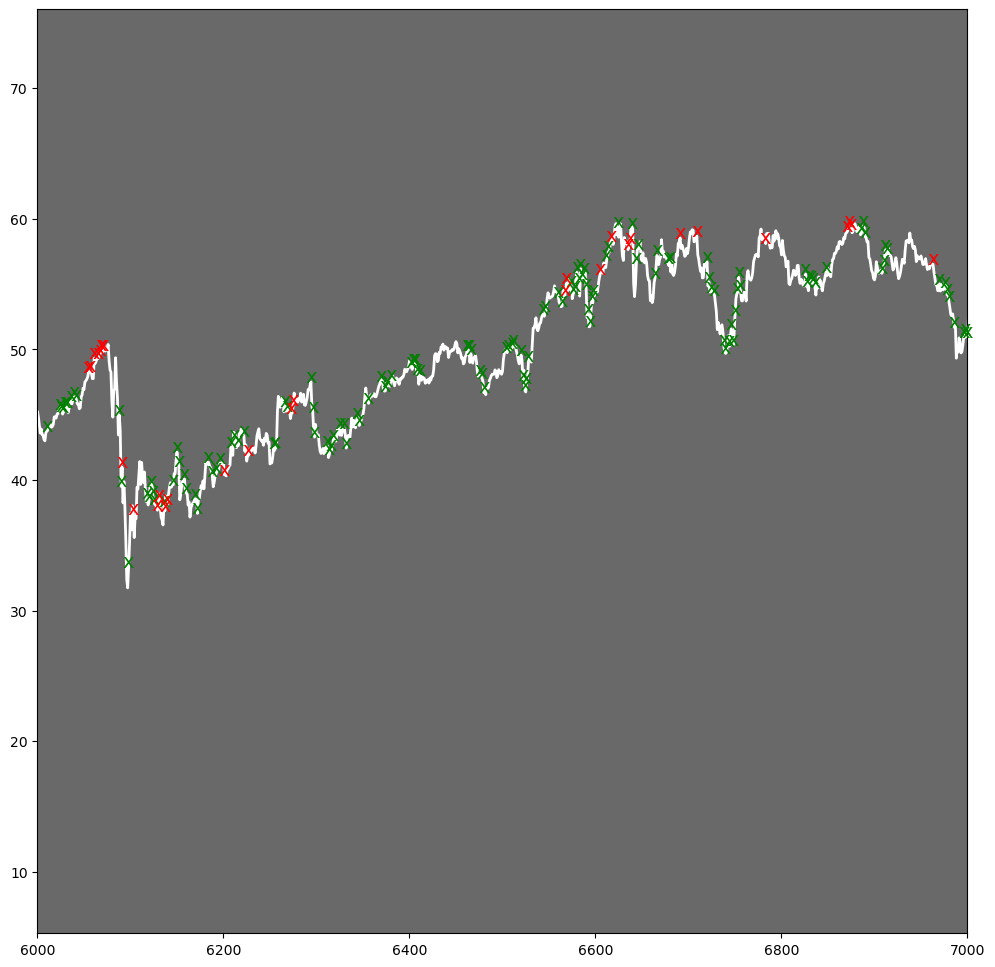

In [86]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 12))

# Price plot
ax1.set_facecolor('dimgrey')
ax1.plot(data.index, data['Close'], linewidth = 2, color = "white")

up = df["State"][df["State"] == 1]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date, data.iloc[date, 3]), color='green', fontsize=14, ha='center')
    
up = df["State"][df["State"] == 0]

long_signal_dates = up.index
for date in long_signal_dates:
    ax1.annotate('x', xy=(date, data.iloc[date, 3]), color='red', fontsize=14, ha='center')

plt.xlim(6000,7000)
#plt.ylim(0,50)
plt.show()